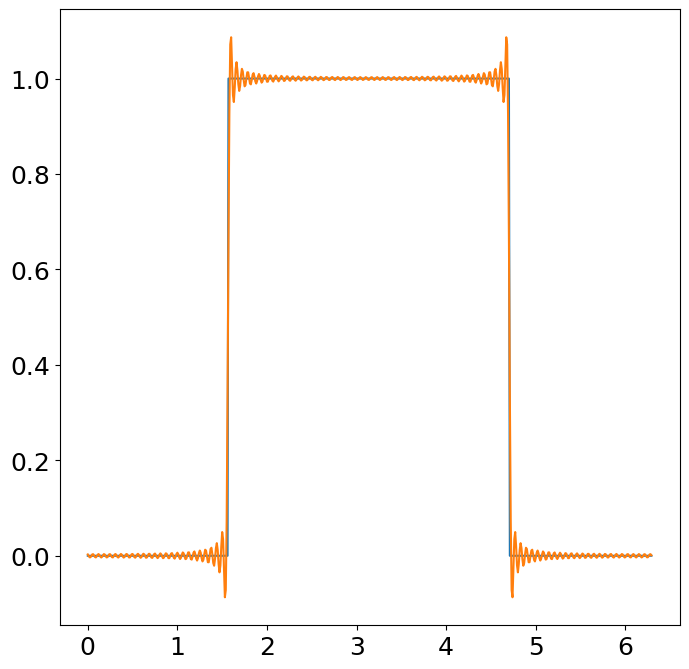

In [27]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib import animation, rc
from IPython.display import HTML

plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams.update({'font.size': 18})
plt.rcParams['animation.html'] = 'jshtml'

# Test function (Top Hat Function)

dx = 0.01
L = 2*np.pi
x = np.arange(0, L+dx, dx)
n = len(x)
nquart = int(np.floor(n/4))

f = np.zeros_like(x)
f[nquart:3*nquart] = 1

A0 = np.sum(f * np.ones_like(x)) * dx * 2 / L
fFs = A0/2 * np.ones_like(f)

for k in range(1,100):
    Ak = np.sum(f * np.cos(2*np.pi*k*x/L)) * dx * 2 / L
    Bk = np.sum(f * np.sin(2*np.pi*k*x/L)) * dx * 2 / L
    fFs = fFs + Ak*np.cos(2*np.pi*k*x/L) + Bk*np.sin(2*np.pi*k*x/L)

plt.plot(x,f)
plt.plot(x, fFs)
plt.show()

# In order for an approximation of  discontinues portion of the graph, all infinite frequencies will be required

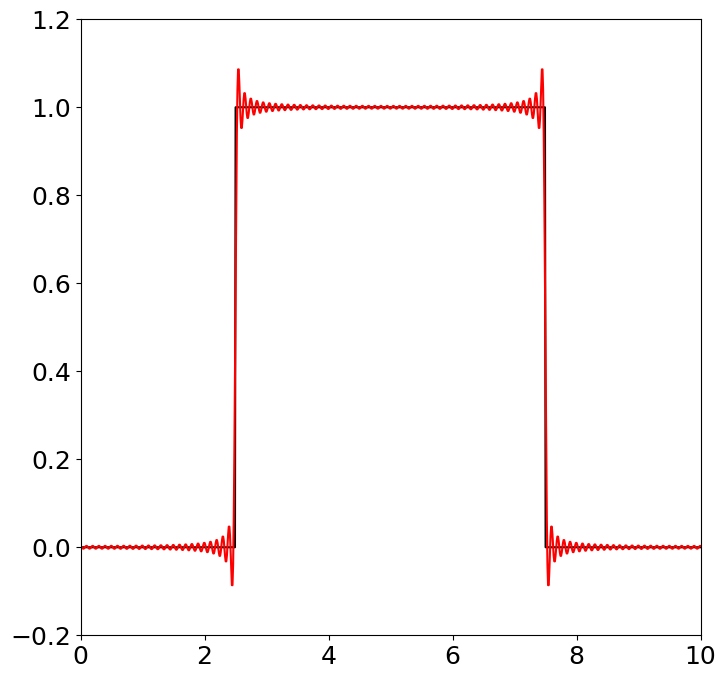

In [36]:
L = 10
A0 = np.sum(f * np.ones_like(x)) * dx * 2 / L
fFs = A0/2 * np.ones_like(f)

fig,ax = plt.subplots()
plt.plot(x,f,color='k')
fFs_plot, = plt.plot([],[],color='r')

all_fFs = np.zeros((len(fFs),101))
all_fFs[:,0] = fFs

for k in range(1,101):
    Ak = np.sum(f * np.cos(2*np.pi*k*x/L)) * dx * 2 / L
    Bk = np.sum(f * np.sin(2*np.pi*k*x/L)) * dx * 2 / L
    fFs = fFs + Ak*np.cos(2*k*np.pi*x/L) + Bk*np.sin(2*k*np.pi*x/L)
    all_fFs[:,k] = fFs

def init():
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(-0.2, 1.2)
    return fFs

def animate(iter):
    fFs_plot.set_data(x,all_fFs[:,iter])
    return fFs_plot

anim = animation.FuncAnimation(fig,animate,init_func=init,frames=101,interval=50,blit=False,repeat=False)
HTML(anim.to_jshtml())